In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


**1: Defective Heart**
**0:Healthy Heart**

In [ ]:
 X = df.drop(columns='target',axis=1)

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
Y = df['target']

In [ ]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


**Splitting dataset into Train and Test**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=28)

In [ ]:
print(X_test.shape,X_train.shape)

(61, 13) (242, 13)


**Model Train -: we use logistic regresssion**

In [ ]:
model= LogisticRegression()

In [ ]:
#Train the model with Training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_train

,target
6,1
93,1
155,1
132,1
217,0
...,...
251,0
289,0
130,1
154,1


In [ ]:
score = accuracy_score(Y_test,Y_pred)

In [ ]:
print("the  accuracy score is ", score)

the  accuracy score is  0.8032786885245902


**building a predictive system**

In [ ]:

# Original input data
input_data = (62, 0, 140, 268, 0, 160, 0, 3.6, 0, 2, 2)

# Add missing features (e.g., using 0 as placeholders)
input_data_with_defaults = input_data + (0, 0)  # Replace (0, 0) with appropriate defaults

# Convert to NumPy array
arr = np.array(input_data_with_defaults)

# Check shape and values
print(f"Input array: {arr}")
print(f"Shape: {arr.shape}")

Input array: [ 62.    0.  140.  268.    0.  160.    0.    3.6   0.    2.    2.    0.
   0. ]
Shape: (13,)


In [ ]:
# Reshape the array and predict
prediction = model.predict(arr.reshape(1, -1))
print(f"Prediction: {prediction}")


Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if prediction == 0:
  print('You are healthy')
else:
  print('consult your  doctor')

consult your  doctor


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-163-ce1fd4cf2271>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='viridis')


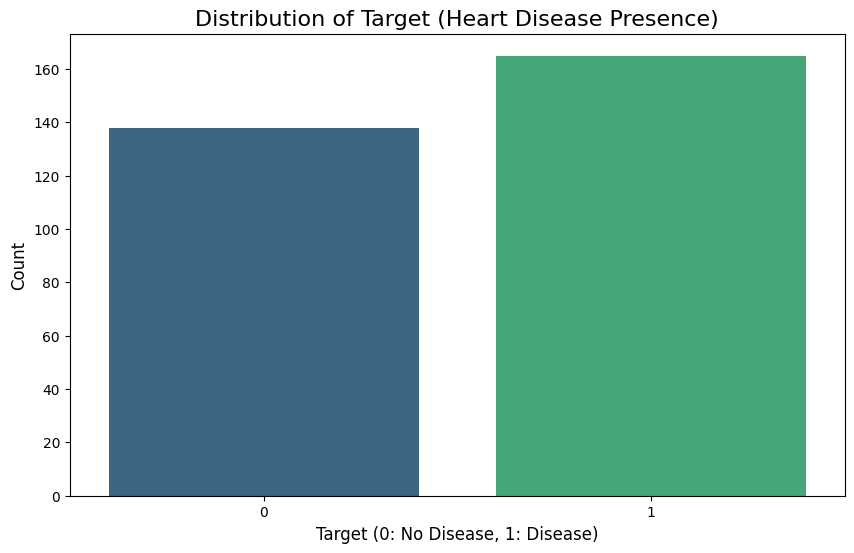

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target', palette='viridis')
plt.title('Distribution of Target (Heart Disease Presence)', fontsize=16)
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

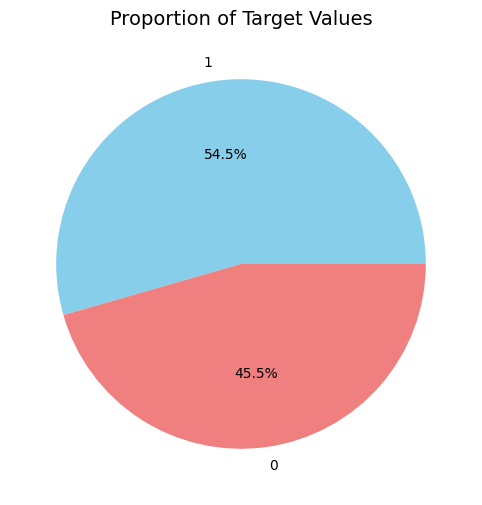

In [ ]:
# Pie chart for target distribution
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Target Values', fontsize=14)
plt.show()


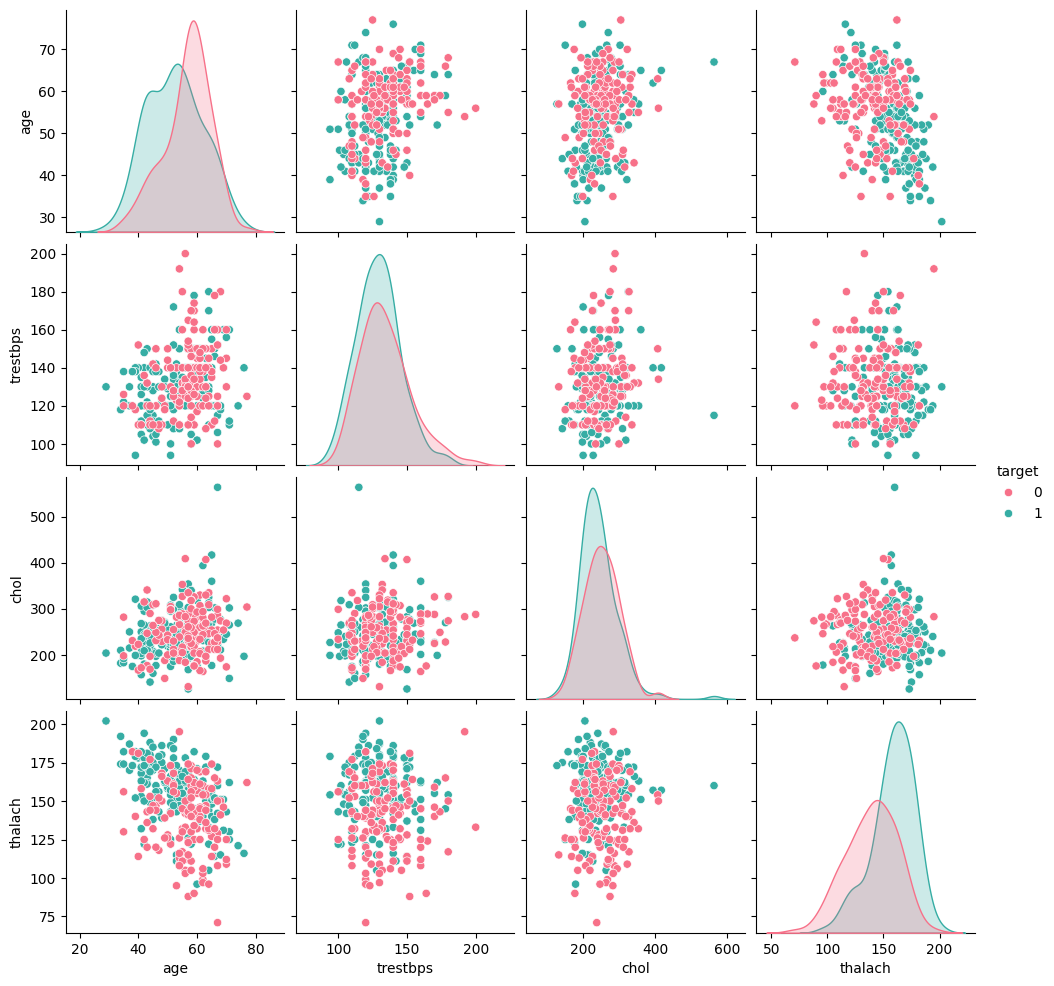

In [ ]:
# Pair plot for selected columns
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='husl')
plt.show()


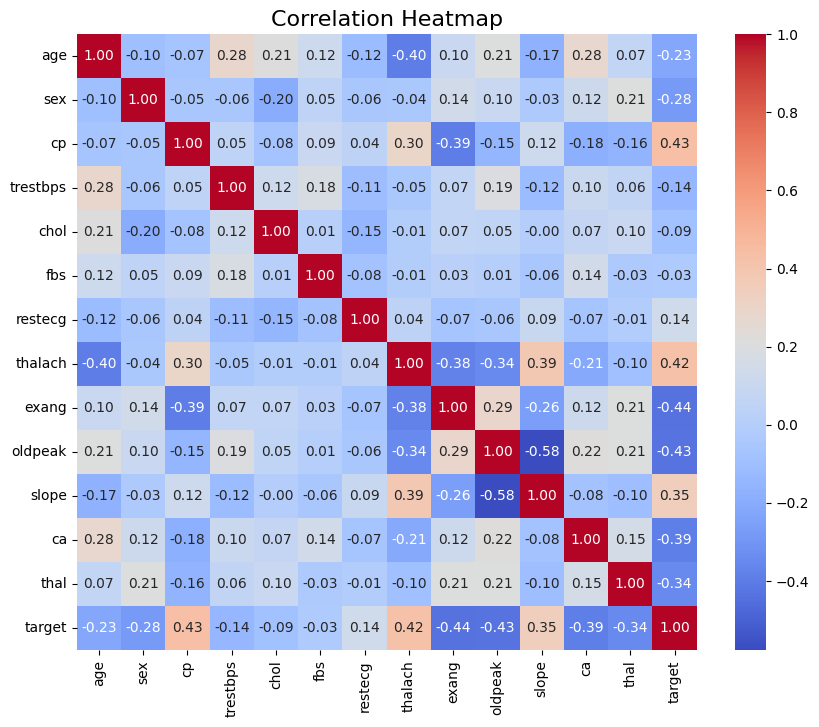

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


<ipython-input-99-f7323e42ff74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='age', palette='Set3')


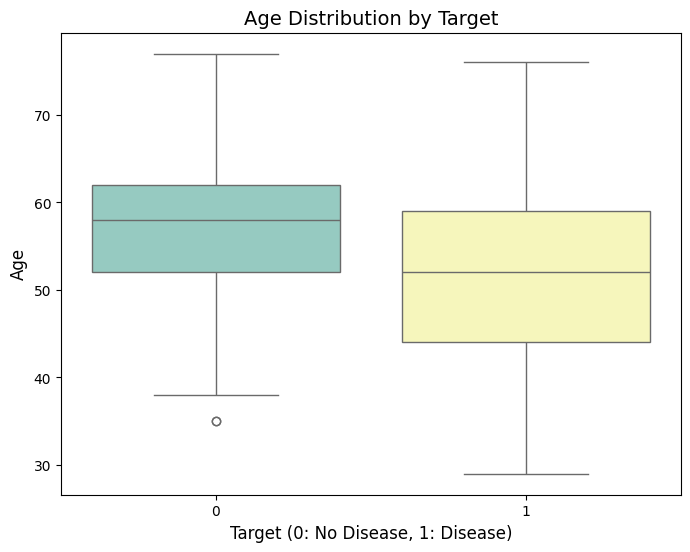

In [ ]:
# Box plot for age distribution by target
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='age', palette='Set3')
plt.title('Age Distribution by Target', fontsize=14)
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()


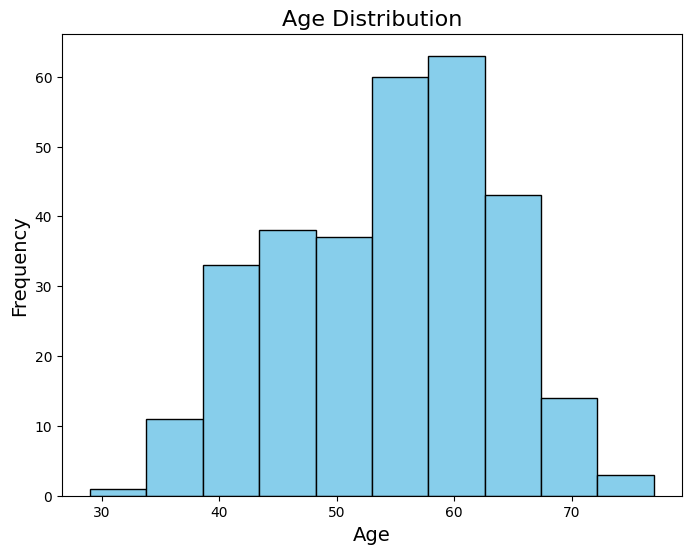

In [ ]:
if 'age' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Age Distribution', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()
else:
    print("Column 'age' not found in the dataset.")

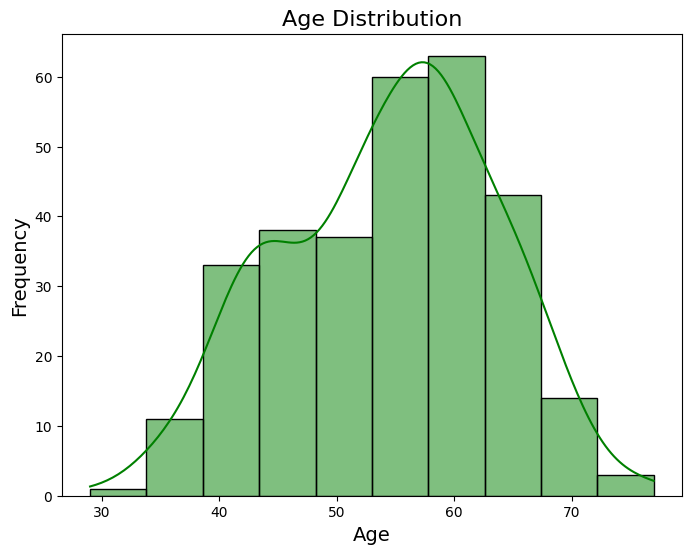

In [ ]:
import seaborn as sns

# Histogram for the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='green', bins=10)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
